# Social Vulnerability Index 2018 - United States 

<hr>

CDC’s Social Vulnerability Index (SVI) is a tool to spatially identify and socially vulnerable populations. The SVI uses U.S. Census variables that reflect at-risk populations to identify and map vulnerable areas. Information on the location and relative concentration of different types of social vulnerabilities in small geographic areas, such as census tracts can help emergency managers locate and plan for the specific needs of their communities, before, during, and after a disaster.

The SVI draws together 15 different measures of vulnerability in 4 different themes : 
- Socioeconomic 
- Household Composition & Disability 
- Minority Status & Language 
- Housing Type & Transportation

Using a percentile ranking method, each tract receives a separate ranking from 0 (lowest vulnerability) to 1 (highest vulnerability) for each of the 4 themes, as well as an overall ranking.

Hereafter, we will use Plotly library to spatially visualize this US Social Vulnerability Index.

Data can be downloaded at the following link : https://svi.cdc.gov/data-and-tools-download.html

## Import required libraries

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import geopandas as gpd
import json
import plotly.express as px

## Data pre-processing

To visualize the Social Vulnerability Index in the US, we chose to use a Choropleth Map which is a map composed of colored polygons. It is a useful way to represent spatial variations of a quantity.

In order to make Choropleth Maps we need two main types of input :

1. Geometry information to shape the map : here a JSON file
2. A list of values indexed by feature identifier to color the map : here a CSV file

### JSON file

Here we load a CSV file containing the geometry information for US counties, where `feature.id` is a *'FIPS'* code.

We only keep the columns required and convert the CSV file into a GeoJSON file.

In [2]:
map_path = 'Data/SVI2018_US_county.shp'
map_df = gpd.read_file(map_path)

map_df.drop(map_df.loc[:, 'LOCATION':'Shape_STLe'].columns, inplace=True, axis = 1)

geo_json_data = json.loads(map_df.to_json())

### CSV file

Here we load the CSV file which contains the SVI data by county, also indexed by *'FIPS'* code.

We select and properly rename the required columns to color our maps.

In the dataset, values of -999 represent "null" or "no data", so we replace these values by special value `np.nan` in order to ignore them on our mapping.

In [3]:
df = pd.read_csv('Data/SVI2018_US_COUNTY.csv', dtype={"FIPS": str})


df.rename(columns={'RPL_THEME1':'SS_SVI', 'RPL_THEME2':'HCD_SVI', 'RPL_THEME3':'MSL_SVI', 'RPL_THEME4':'HTT_SVI', 'RPL_THEMES': 'SVI'}, inplace=True)
df.replace(-999.0, np.nan, inplace=True)
svi = df[['ST','STATE','ST_ABBR','COUNTY','FIPS','SS_SVI','HCD_SVI','MSL_SVI','HTT_SVI','SVI']]

svi.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,SS_SVI,HCD_SVI,MSL_SVI,HTT_SVI,SVI
0,35,NEW MEXICO,NM,Rio Arriba,35039,NaN,0.8758,0.9268,0.5409,NaN
1,1,ALABAMA,AL,Autauga,01001,0.3631,0.5810,0.5947,0.3741,0.4354
2,1,ALABAMA,AL,Blount,01009,0.6143,0.3187,0.5915,0.1741,0.4242
3,1,ALABAMA,AL,Butler,01013,0.8455,0.9077,0.6447,0.6259,0.8653
4,1,ALABAMA,AL,Calhoun,01015,0.7866,0.8303,0.6507,0.6492,0.8252


## SVI Mapping

To create our Choropleth Maps we will use Plotly Express' `px.choropleth` function.

The GeoJSON data is passed to the `geojson` argument, and the data is passed into the `color` argument of `px.choropleth`, in the same order as the IDs are passed into the `locations` argument.

We use the `featureidkey` parameter to specify where to match the values of `locations`. Here we use the *'FIPS'* key in the `properties` field.

The SVI score is ranked from 0 (lowest vulnerability) to 1 (highest vulnerability), which is why we have defined the `range_color` from 0 to 1.

Our dataset focusing on the United States, we have set `layout.geo.scope` to *'usa'* to automatically configure the map to display data centered on the United States in an appropriate projection.

### Overall SVI Map

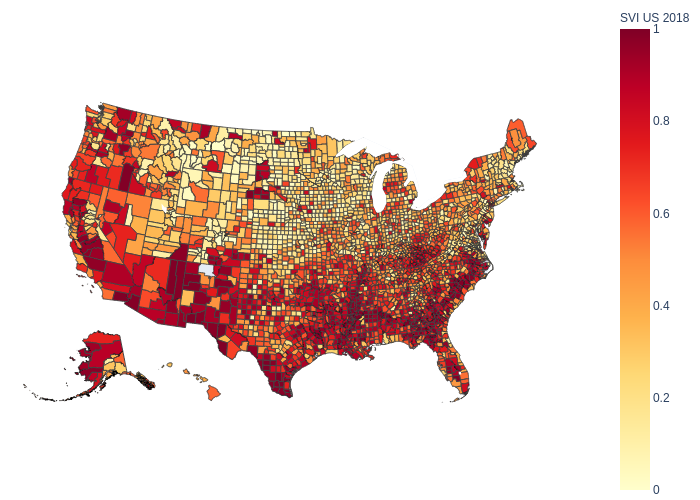

In [4]:
fig_svi = px.choropleth(svi, geojson=geo_json_data, locations='FIPS', color='SVI',
                    featureidkey="properties.FIPS",
                    hover_data=["STATE", "COUNTY"],
                    color_continuous_scale="YlOrRd",
                    range_color=(0, 1),
                    scope="usa",
                    labels={'SVI':'SVI US 2018'}
                   )
fig_svi.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

Image(data=fig_svi.to_image())

### Socioeconomic Status Map

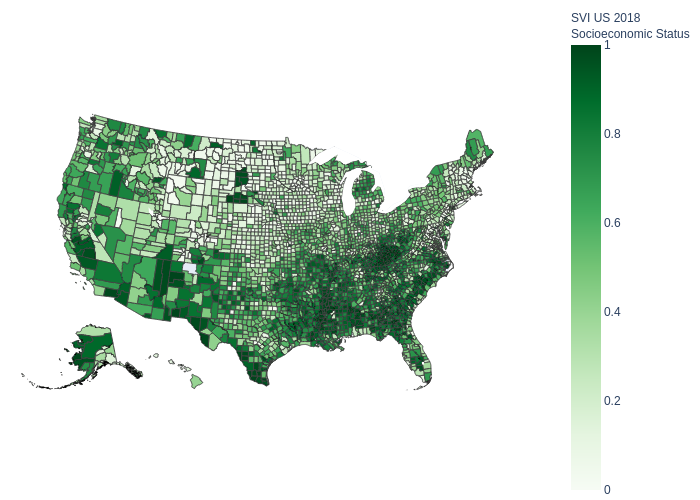

In [5]:
fig_ss_svi = px.choropleth(svi, geojson=geo_json_data, locations='FIPS', color='SS_SVI',
                    featureidkey="properties.FIPS",
                    hover_data=["STATE", "COUNTY"],
                    color_continuous_scale="Greens",
                    range_color=(0, 1),
                    scope="usa",
                    labels={'SS_SVI':'SVI US 2018<br>Socioeconomic Status'}
                   )
fig_ss_svi.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

Image(data=fig_ss_svi.to_image())

### Household Composition & Disability Map

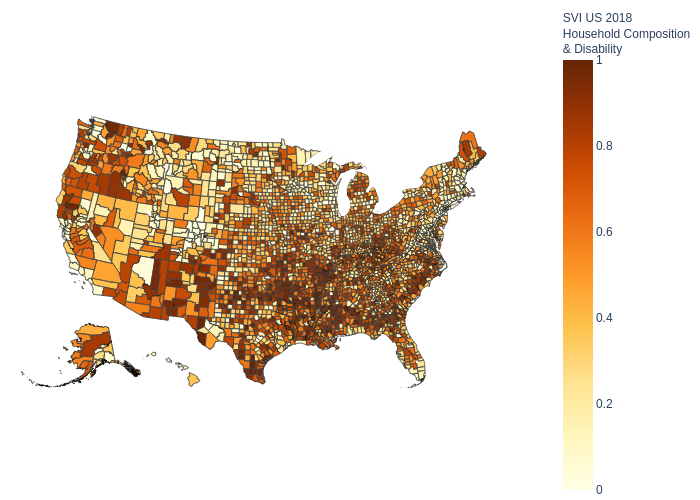

In [6]:
fig_hcd_svi = px.choropleth(svi, geojson=geo_json_data, locations='FIPS', color='HCD_SVI',
                    featureidkey="properties.FIPS",
                    hover_data=["STATE", "COUNTY"],
                    color_continuous_scale="YlOrBr",
                    range_color=(0, 1),
                    scope="usa",
                    labels={'HCD_SVI':'SVI US 2018<br>Household Composition<br>& Disability'}
                   )

fig_hcd_svi.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

Image(data=fig_hcd_svi.to_image())

### Minority Status & Language Map

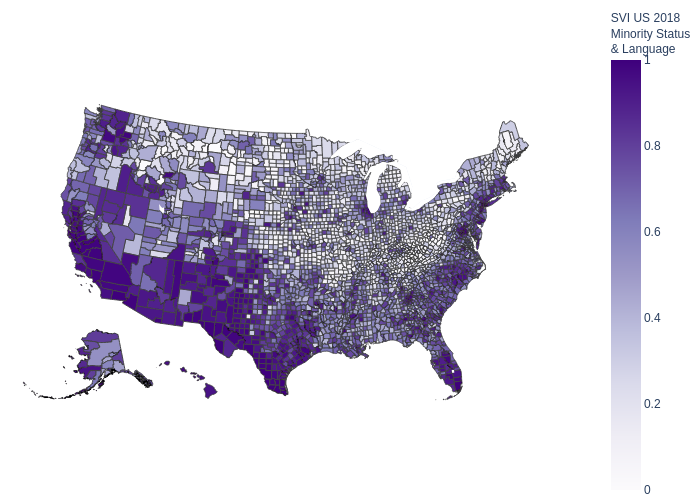

In [7]:
fig_msl_svi = px.choropleth(svi, geojson=geo_json_data, locations='FIPS', color='MSL_SVI',
                    featureidkey="properties.FIPS",
                    hover_data=["STATE", "COUNTY"],
                    color_continuous_scale="Purples",
                    range_color=(0, 1),
                    scope="usa",
                    labels={'MSL_SVI':'SVI US 2018<br>Minority Status<br>& Language'}
                   )
fig_msl_svi.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

Image(data=fig_msl_svi.to_image())

### Housing Type & Transportation Map

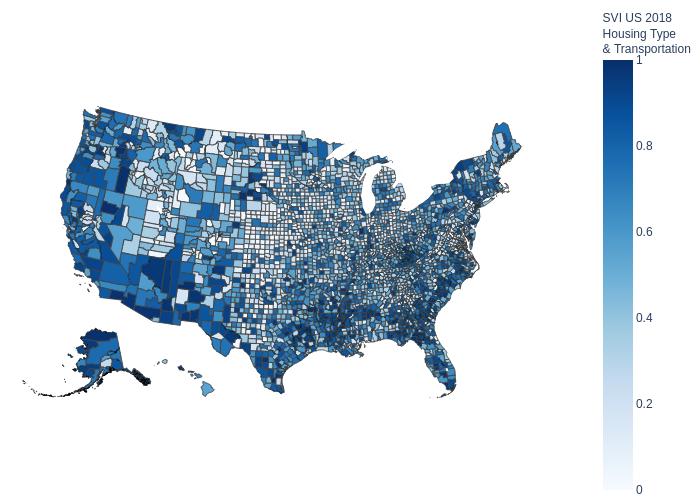

In [8]:
fig_htt_svi = px.choropleth(svi, geojson=geo_json_data, locations='FIPS', color='HTT_SVI',
                    featureidkey="properties.FIPS",
                    hover_data=["STATE", "COUNTY"],
                    color_continuous_scale="Blues",
                    range_color=(0, 1),
                    scope="usa",
                    labels={'HTT_SVI':'SVI US 2018<br>Housing Type<br>& Transportation'}
                   )
fig_htt_svi.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

Image(data=fig_htt_svi.to_image())

<hr>

## Sources

- SVI Documentation : https://svi.cdc.gov/
- Choropleth Maps in Python with Plotly : https://plotly.com/python/choropleth-maps/